In [1]:
import pandas as pd
import numpy as np
import statistics
import math
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Import datasets

data diambil dari https://www.kaggle.com/datasets/mathchi/diabetes-data-set

In [2]:
url = 'https://raw.githubusercontent.com/arofiqimaulana/Course-Python-For-Data-Analysis/762d8c9c29ec0d12251c0268bd85f3c6c0b3ae24/Section%206%20(Data%20Visualization)/data/diabetes.csv'
df = pd.read_csv(url)

In [3]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [4]:
# Deskripsi data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


## Sampling

Rumus Slovin

n = N/(1+N.e^2)

In [5]:
N = len(df) # Ukuran Populasi
e = 0.05 # Tingkat Signifikansi

In [6]:
n = N/(1+N*e**2)
n

263.01369863013696

In [7]:
# Dari 768 orang, kita akan ambil sampel sebanyak 263
n_sample = round(n)
n_sample

263

In [8]:
# Mengambil data secara acak
sampled_df = df.sample(n=n_sample)
sampled_df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
130,4,173,70,14,168,29.7,0.361,33,1
147,2,106,64,35,119,30.5,1.400,34,0
507,1,130,60,23,170,28.6,0.692,21,0
203,2,99,70,16,44,20.4,0.235,27,0
172,2,87,0,23,0,28.9,0.773,25,0
...,...,...,...,...,...,...,...,...,...
259,11,155,76,28,150,33.3,1.353,51,1
228,4,197,70,39,744,36.7,2.329,31,0
610,3,106,54,21,158,30.9,0.292,24,0
137,0,93,60,25,92,28.7,0.532,22,0


## Statistika Descriptive

In [9]:
sampled_df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
130,4,173,70,14,168,29.7,0.361,33,1
147,2,106,64,35,119,30.5,1.400,34,0
507,1,130,60,23,170,28.6,0.692,21,0
203,2,99,70,16,44,20.4,0.235,27,0
172,2,87,0,23,0,28.9,0.773,25,0
...,...,...,...,...,...,...,...,...,...
259,11,155,76,28,150,33.3,1.353,51,1
228,4,197,70,39,744,36.7,2.329,31,0
610,3,106,54,21,158,30.9,0.292,24,0
137,0,93,60,25,92,28.7,0.532,22,0


In [10]:
# Misalnya kita ingin mengetahui informasi mengenai Glukosa pasien
val = sampled_df['Glucose']

In [11]:
# 1. Central Tendency
# Dapat menggunakan mean, median, modus
mean = np.mean(val) # mean
median = np.percentile(val,50) # median
modus = statistics.mode(val) # modus

In [12]:
print("mean =",mean)
print("median =",median)
print("modus =",modus)

mean = 120.49049429657795
median = 114.0
modus = 100


In [13]:
# 2. Dispersion
# Dapat menggunakan range, std deviasi, koefisien keragaman

In [14]:
# Range
nilai_min = min(val)
nila_max = max(val)
range = nila_max-nilai_min
range

197

In [15]:
# Standard Deviasi
std = np.std(val)
std

32.16483958982729

In [16]:
# Koefisien Keragaman (%)
koef_keragaman = std*100/mean
koef_keragaman

26.69491877978029

## Charts

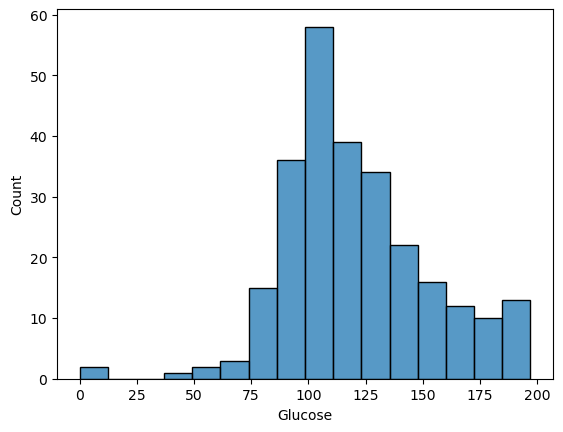

In [17]:
"""
Grafik menunjukkan bahwa data glukosa berdistribusi normal (no skew) artinya pasien yang glukosanya
rendah dan tinggi sama-sama banyaknya
"""

sns.histplot(val)
plt.show()

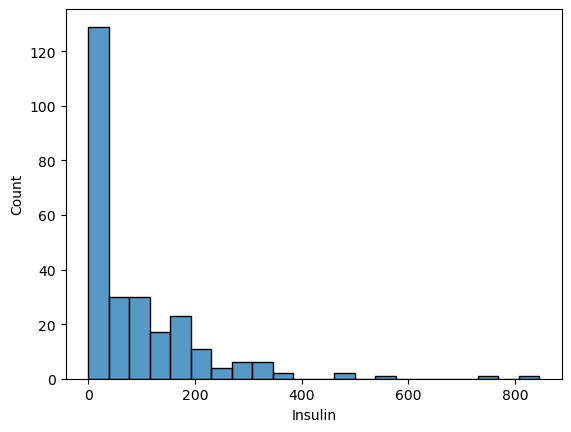

In [18]:
"""
Grafik menunjukkan bahwa data glukosa tidak berdistribusi normal (kurva menjulur ke kanan). 
artinya lebih banyak pasien yang memiliki insulin rendah.
"""

sns.histplot(sampled_df.Insulin)
plt.show()

<Axes: >

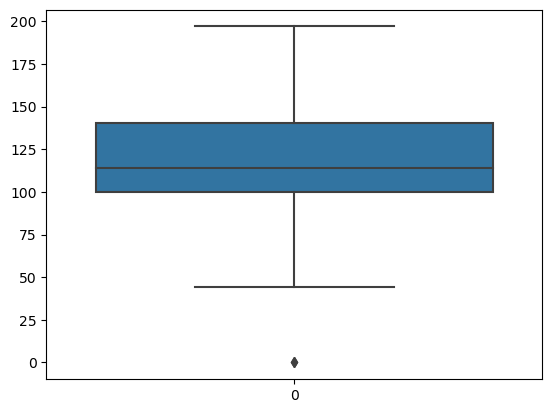

In [25]:
"""
Boxplot berguna untuk mengetahui persebaran data dan pemusatan data serta mengetahui ada
tidaknya outlier.
"""
sns.boxplot(val.values.tolist())

<Axes: >

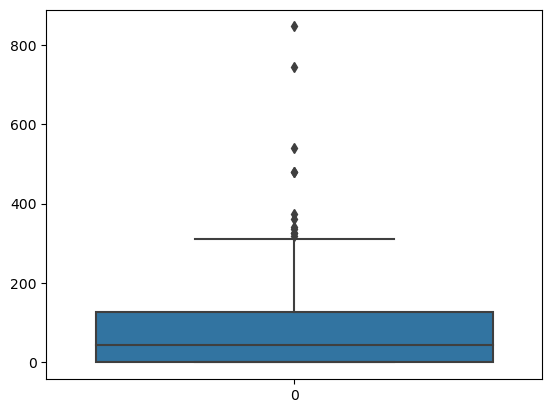

In [24]:
sns.boxplot(sampled_df.Insulin.values.tolist())